# Packages

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from sklearn.cluster import KMeans
import pickle

# Reading the data

In [116]:
G = nx.Graph()
data = open("facebookNet.txt","r")
lines=data.readlines()
for line in lines:
    line_split=line.split(" ")
    G.add_edge(int(line_split[0]),int(line_split[1]))

# Constructing the adjacency matrix

In [117]:
# construction of the adjacency matrix
edge_mat= nx.to_numpy_array(G, nodelist=[i for i in range(4039)])
edge_mat

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [270]:
# adjacency matrix of top10Nodes
top10NodesTopsis = pd.read_csv("Data/top10NodesTopsis.csv")
top10NodesTopsis.rename(columns = {'Node':'TopsisN'}, inplace = True)
top10NodesTopsis = top10NodesTopsis['TopsisN'].tolist()
edge_mat10 = edge_mat[top10NodesTopsis]
edge_mat10

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# K-means application

In [260]:
#initialize the parameters
k_clusters = 10
results = []
model = KMeans(n_clusters=k_clusters, n_init=1, max_iter=20000, init = edge_mat10)

In [261]:
#start the trainning
model.fit(edge_mat)
results = list(model.labels_)

In [262]:
Clusters = pd.DataFrame(results)

In [263]:
#Display each Node by its Cluster
Nodes = pd.DataFrame([i for i in range(4039)], columns = ['Node'])
Clusters = pd.DataFrame(results, columns = ['Cluster'])
nodeByCluster = pd.concat([Nodes, Clusters], axis = 1)
nodeByCluster

,Node,Cluster
0,0,4
1,1,8
2,2,8
3,3,8
4,4,8
...,...,...
4034,4034,8
4035,4035,8
4036,4036,8
4037,4037,8


In [264]:
#Display first Node of each Cluster
gk = nodeByCluster.groupby('Cluster')
gk.first()

,Node
Cluster,
0,107
1,1684
2,1912
3,3437
4,0
5,1085
6,686
7,348
8,1


In [265]:
#Group all Nodes of communities in lists
community = []
for i in range(10):
    community.append(gk.get_group(i)['Node'].tolist())
community

[[107],
 [1684],
 [1912],
 [3437],
 [0],
 [1085],
 [686,
  687,
  688,
  693,
  694,
  695,
  696,
  697,
  698,
  701,
  703,
  705,
  706,
  708,
  709,
  711,
  713,
  718,
  719,
  722,
  724,
  726,
  727,
  728,
  731,
  734,
  737,
  738,
  739,
  741,
  745,
  747,
  748,
  752,
  754,
  755,
  758,
  760,
  762,
  764,
  766,
  770,
  772,
  773,
  774,
  777,
  778,
  779,
  780,
  781,
  784,
  787,
  792,
  797,
  800,
  805,
  807,
  810,
  814,
  815,
  817,
  819,
  820,
  823,
  824,
  827,
  828,
  829,
  830,
  831,
  834,
  835,
  838,
  840,
  842,
  844,
  845,
  847,
  848,
  849,
  853,
  856],
 [348,
  360,
  368,
  370,
  373,
  374,
  376,
  378,
  387,
  388,
  391,
  392,
  394,
  395,
  397,
  398,
  400,
  402,
  404,
  408,
  409,
  412,
  414,
  417,
  419,
  420,
  422,
  423,
  428,
  430,
  431,
  432,
  434,
  436,
  438,
  439,
  444,
  451,
  452,
  456,
  460,
  461,
  463,
  465,
  471,
  473,
  475,
  479,
  482,
  487,
  488,
  492,
  493,
  49

In [266]:
size=[]
for i in range(10):
    sslist=[]
    for j in community[i]:
        list1=[107,1684,1912,3437,0,1085,698,567,58,428]
        if j in list1:
            sslist.append(1000)
        else:
            sslist.append(35)
    size.append(sslist)
size

[[1000],
 [1000],
 [1000],
 [1000],
 [1000],
 [1000],
 [35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  1000,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35],
 [35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  1000,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,

In [274]:
for i in range(10):
    print('Cluster[',i,'] = ',community[i])

Cluster[ 0 ] =  [107]
Cluster[ 1 ] =  [1684]
Cluster[ 2 ] =  [1912]
Cluster[ 3 ] =  [3437]
Cluster[ 4 ] =  [0]
Cluster[ 5 ] =  [1085]
Cluster[ 6 ] =  [686, 687, 688, 693, 694, 695, 696, 697, 698, 701, 703, 705, 706, 708, 709, 711, 713, 718, 719, 722, 724, 726, 727, 728, 731, 734, 737, 738, 739, 741, 745, 747, 748, 752, 754, 755, 758, 760, 762, 764, 766, 770, 772, 773, 774, 777, 778, 779, 780, 781, 784, 787, 792, 797, 800, 805, 807, 810, 814, 815, 817, 819, 820, 823, 824, 827, 828, 829, 830, 831, 834, 835, 838, 840, 842, 844, 845, 847, 848, 849, 853, 856]
Cluster[ 7 ] =  [348, 360, 368, 370, 373, 374, 376, 378, 387, 388, 391, 392, 394, 395, 397, 398, 400, 402, 404, 408, 409, 412, 414, 417, 419, 420, 422, 423, 428, 430, 431, 432, 434, 436, 438, 439, 444, 451, 452, 456, 460, 461, 463, 465, 471, 473, 475, 479, 482, 487, 488, 492, 493, 496, 497, 500, 503, 506, 507, 511, 512, 513, 514, 515, 517, 520, 523, 524, 525, 527, 537, 542, 544, 545, 553, 556, 557, 559, 560, 561, 563, 566, 567, 570, 59

# Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

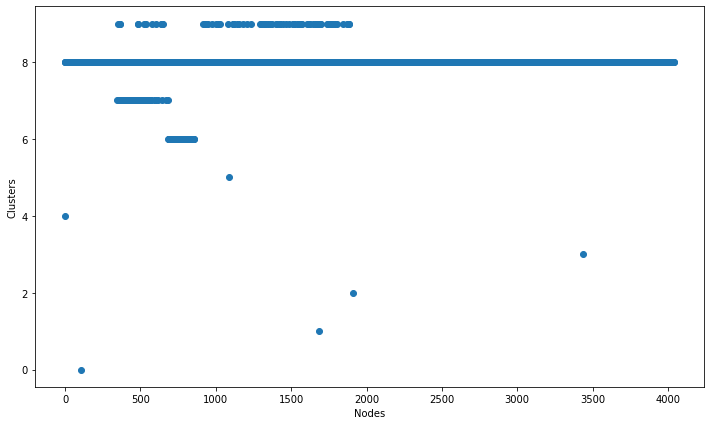

In [267]:
#Visualize Nodes by Clusters
plt.scatter(nodeByCluster['Node'], nodeByCluster['Cluster'])
plt.ylabel("Clusters")
plt.xlabel("Nodes")
plt.show

In [169]:
with open('networkShape.pkl', 'rb') as f:
    sp1 = pickle.load(f)

In [170]:
plt.rcParams.update({'figure.figsize': (12, 7)})

In [211]:
inf10 = pd.read_csv("Data/top10NodesTopsis.csv")

In [229]:
keyList = inf10.head(10).Node.tolist()
myDict = {key: key for key in keyList}

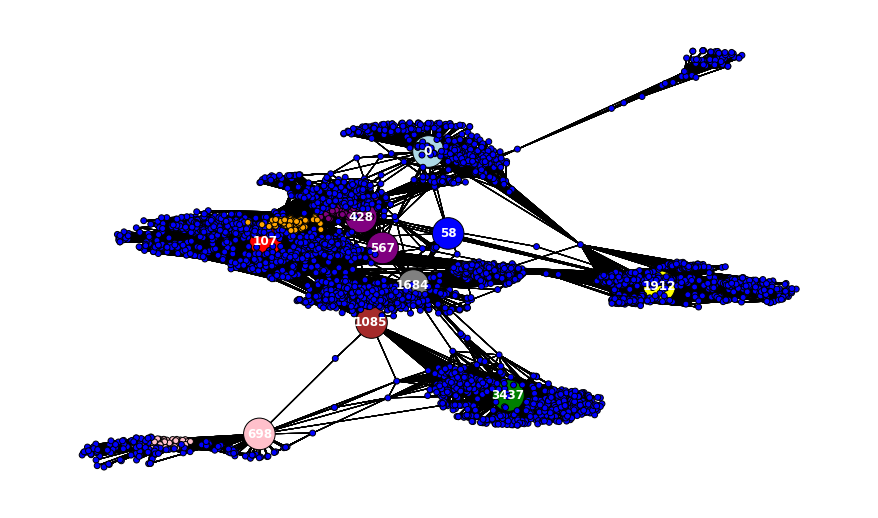

In [232]:
colors=['red','grey','yellow','green','lightblue','brown','pink','purple','blue','orange']
for i in range(10):
    nx.draw(G, pos=sp1, nodelist=community[i], node_color= colors[i],node_size=size[i], edgecolors='black')

labels=nx.draw_networkx_labels(G, pos = sp1, labels=myDict, font_color='w', font_weight='bold')

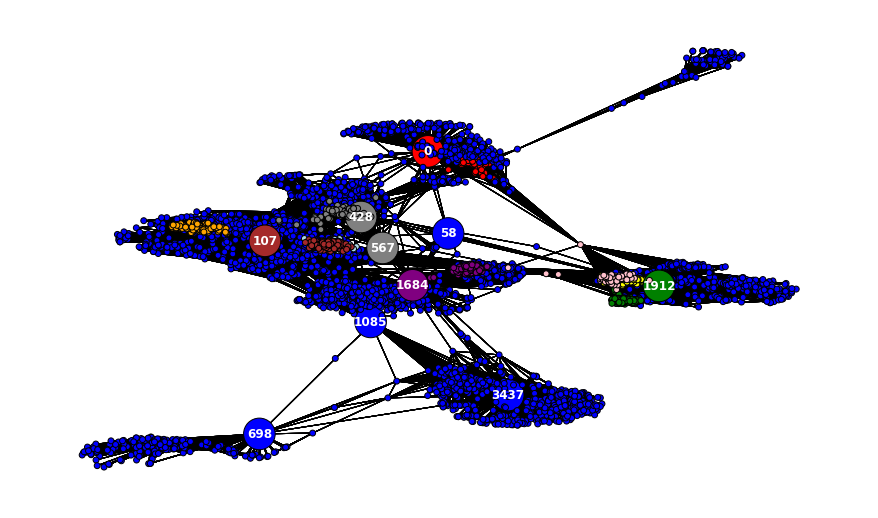

In [220]:
#without init
colors=['red','blue','yellow','green','lightblue','brown','grey','purple','pink','orange']
for i in range(10):
    nx.draw(G, pos=sp1, nodelist=community[i], node_color= colors[i],node_size=size[i], edgecolors='black')

labels=nx.draw_networkx_labels(G, pos = sp1, labels=myDict, font_color='w', font_weight='bold')

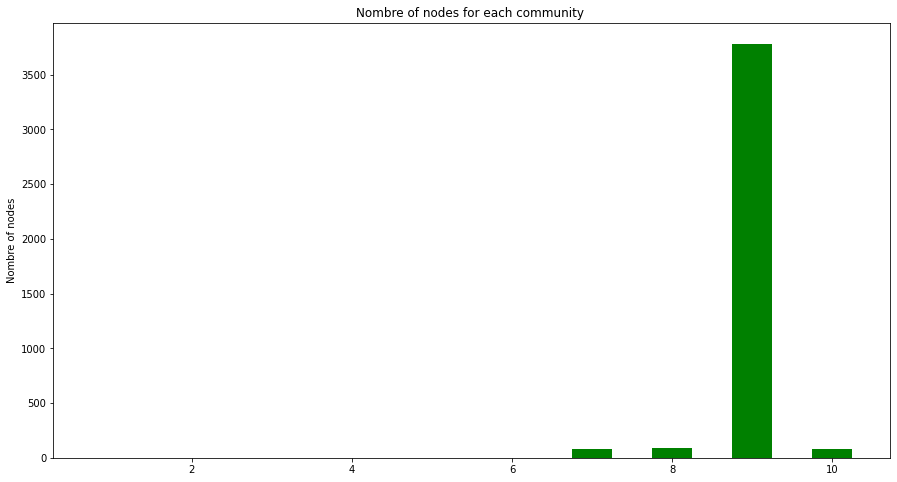

In [251]:
dict1={}#this dictionary will be fill by community number and number of nodes its have
for i in range(1,len(community)+1):
  dict1[i]=len(community[i-1])

fig = plt.figure(figsize = (15,8))
#draw the plot Nombre of nodes for each community
plt.bar(list(dict1.keys()), list(dict1.values()), color ='green',width = 0.5)

plt.ylabel("Number of community")
plt.ylabel("Nombre of nodes")
plt.title("Nombre of nodes for each community ")
plt.show()